## Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.datasets import load_breast_cancer
import pandas as pd

## Load Dataset

In [ ]:
data = load_breast_cancer()
# Understanding Data
print(data)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())
# Splitting data into dependent and independent variable
X = data.data
y = data.target

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)

lda_accuracy = accuracy_score(y_test, lda_pred)
lda_confusion = confusion_matrix(y_test, lda_pred)
lda_report = classification_report(y_test, lda_pred, output_dict = True)

print("LDA Accuracy:", lda_accuracy)
print("LDA Confusion Matrix:")
print(lda_confusion)
print("LDA Classification Report:")
print(classification_report(y_test, lda_pred))

LDA Accuracy: 0.956140350877193
LDA Confusion Matrix:
[[39  4]
 [ 1 70]]
LDA Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_confusion = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred, output_dict = True)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:")
print(lr_confusion)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Confusion Matrix:
[[41  2]
 [ 1 70]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Accuracy of lda: 0.956140350877193
Accuracy of lr: 0.9736842105263158


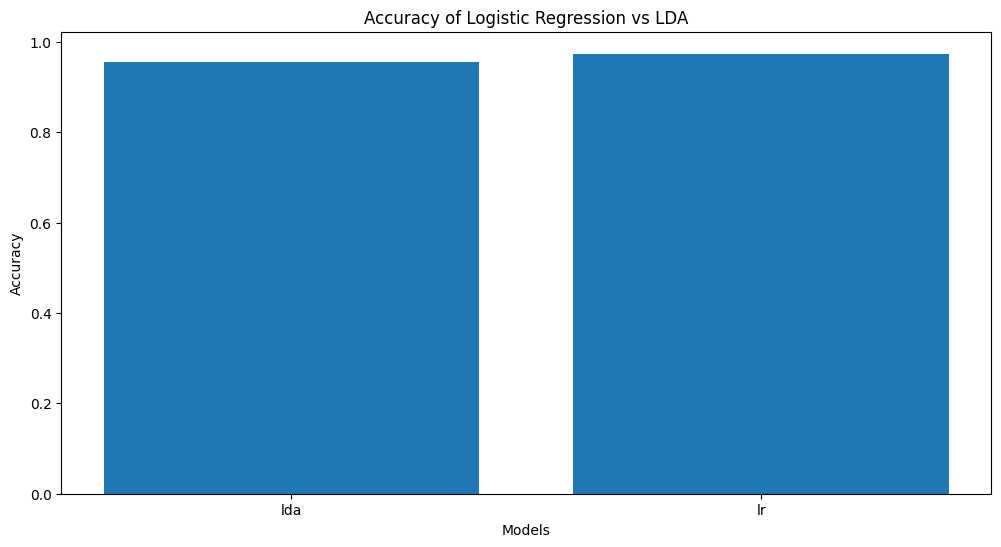

In [ ]:
accuracies = {'lda': lda_accuracy, 'lr':lr_accuracy}
for model_type in accuracies:
    print(f'Accuracy of {model_type}: {accuracies[model_type]}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression vs LDA')
plt.show()